<a href="https://colab.research.google.com/github/ardillaCHIKI/El_Desaf-o_de_la_Visi-n_Artificial/blob/main/Codigo_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers
import cv2
from keras.layers import MaxPool2D, Conv2D, UpSampling2D, Input, Dropout
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from skimage import color

#img - cilir.rgb2gray(io.imread('image.png'))

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# defining function to plot images pair
def plot_images(color,grayscale):
  plt.figure(figsize=(15,15))
  plt.subplot(1,3,1)
  plt.title('color Image', color= 'green', fontsize = 20)
  plt.imshow(color)
  plt.subplot(1,3,2)
  plt.title('Grayscale Image', color= 'black', fontsize = 20)
  plt.imshow(grayscale, cmap='gray')

  plt.show()

#

# Función para convertir las imagenes a escala de grises
  color.rgb2gray( < image > )

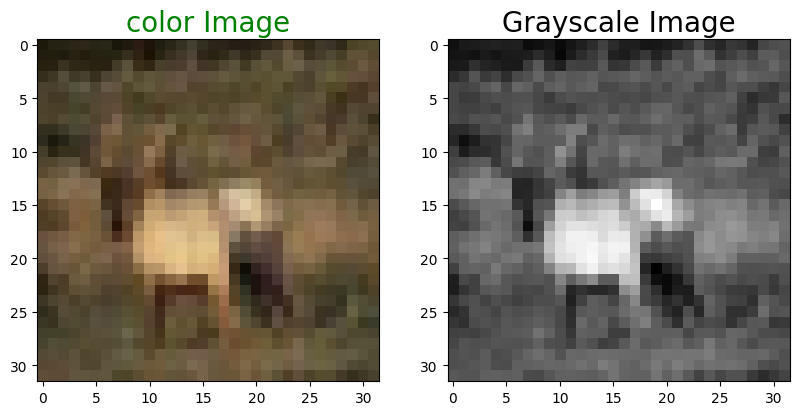

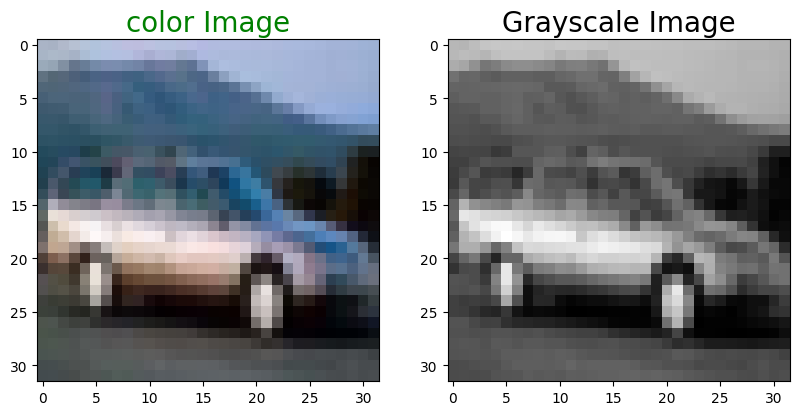

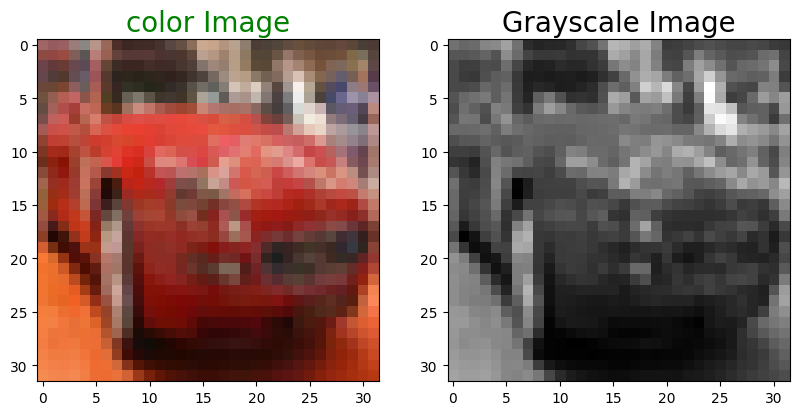

In [4]:
for i in range(3,6):
  plot_images(x_train[i],color.rgb2gray(x_train[i]))

In [10]:
def build_CNN():
    model = Sequential(
        [
        Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
        layers.MaxPool2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPool2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ]
  )
    return model

In [11]:
model = build_CNN()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,762 (198.29 KB)

 Trainable params: 50,762 (198.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train_cat, batch_size=128, epochs=5, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.2102 - loss: 10.7827 - val_accuracy: 0.4245 - val_loss: 1.6051
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4506 - loss: 1.5490 - val_accuracy: 0.4998 - val_loss: 1.4166
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5177 - loss: 1.3712 - val_accuracy: 0.5158 - val_loss: 1.3961
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5507 - loss: 1.2806 - val_accuracy: 0.5314 - val_loss: 1.3789
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5861 - loss: 1.1882 - val_accuracy: 0.5832 - val_loss: 1.2382


In [14]:
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)